In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from mnist import MNIST

mndata = MNIST('sample')

#splitting the data into a training,development, and test set.
train_ratio = 0.8571
test_ratio = 0.0714
dev_ratio = 0.0714

images_train, labels_train = mndata.load_training()
# or
image_test, label_test = mndata.load_testing()

images_dev, images_test, labels_dev, labels_test = train_test_split(image_test, label_test, test_size=test_ratio/(test_ratio + dev_ratio))

index = 5
print(mndata.display(images_train[index]))


............................
............................
............................
............................
............................
............................
...............@@@@.........
.............@@@@@@@........
...........@@@@@..@@........
..........@@@@@...@@........
..........@@@.....@@........
..................@@........
..................@@........
.................@@.........
.............@@@@@@.........
..........@@@@.@@@@.........
.........@@....@@@@@........
........@@....@@@..@@.......
.......@@.....@@.....@@@@...
......@@....@@..............
.....@@@@@@@@...............
.....@@@@@..................
............................
............................
............................
............................
............................
............................


I have chosen boosting so  as to decrease overfitting and thus increase accuracy. I felt this critical as these are handwritten and will vary.

I also chose boosting as I it would be redundant to have both bagging and boosting.

# Boosting

In [4]:
# training a model with defined depth
depth = 6
pruned = DecisionTreeClassifier(max_depth=depth, random_state=4)
pruned.fit(images_train, labels_train)

DecisionTreeClassifier(max_depth=6, random_state=4)

In [5]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost = AdaBoostClassifier(base_estimator= pruned,n_estimators=10,learning_rate=1)
AdaBoost.fit(images_train,labels_train)
print("Accuracy base:",pruned.score(images_dev, labels_dev))
print("Accuracy of BoostClassifier:",AdaBoost.score(images_test, labels_test))

Accuracy base: 0.7384
Accuracy of BoostClassifier: 0.845


### Changing the learning rate

In [6]:
#Changing the learning rate
pruned = DecisionTreeClassifier(max_depth=depth, random_state=4)
pruned.fit(images_train, labels_train)

AdaBoost = AdaBoostClassifier(base_estimator= pruned,n_estimators=10,learning_rate=0.8)
AdaBoost.fit(images_train,labels_train)
print("Accuracy base:",pruned.score(images_test, labels_dev))
print("Accuracy of BoostClassifier:",AdaBoost.score(images_test, labels_test))

Accuracy base: 0.1026
Accuracy of BoostClassifier: 0.8746


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


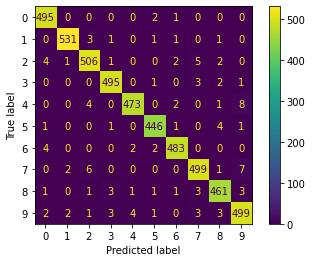

In [15]:
#Confusion Matrix
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
clf = SVC(random_state=0)
clf.fit(images_train, labels_train)
predicted = clf.predict(images_test)
plot_confusion_matrix(clf, images_test, labels_test) 

## Measuring Perfomance

In [16]:
from sklearn.metrics import classification_report
#prints classification_report     
print(classification_report(labels_test, predicted))

#returns a dict, which you can easily sort by prediction
report = classification_report(labels_test, predicted, output_dict=True)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       498
           1       0.99      0.99      0.99       538
           2       0.97      0.97      0.97       521
           3       0.98      0.99      0.98       502
           4       0.99      0.97      0.98       488
           5       0.98      0.98      0.98       454
           6       0.98      0.98      0.98       491
           7       0.97      0.97      0.97       515
           8       0.97      0.97      0.97       475
           9       0.96      0.96      0.96       518

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



The models strugles the most with the number '4' is confused for '9'

## Random Forrest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


clf = RandomForestClassifier(n_estimators=100)

print("Train model")
clf.fit(images_train, labels_train)
#expected = labels[10000:11000].tolist()

print("Compute predictions")
predicted = clf.predict(images_test)

print("Accuracy: ", accuracy_score(labels_test, predicted))




Train model
Compute predictions
Accuracy:  0.969


### Changing n_estimators

In [10]:
# Changing n_estimators
clf = RandomForestClassifier(n_estimators=150)

print("Train model")
clf.fit(images_train, labels_train)
#expected = labels[10000:11000].tolist()

print("Compute predictions")
predicted = clf.predict(images_test)

print("Accuracy: ", accuracy_score(labels_test, predicted))


Train model
Compute predictions
Accuracy:  0.9712


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


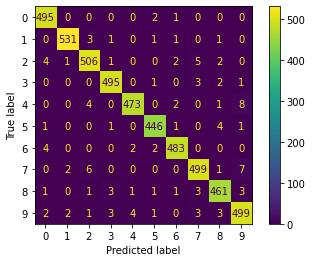

In [11]:
#Confusion Matrix
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
clf = SVC(random_state=0)
clf.fit(images_train, labels_train)
plot_confusion_matrix(clf, images_test, labels_test) 

The models strugles the most with the number '4' is confused for '9'

### Measuring Perfomance

In [12]:
from sklearn.metrics import f1_score, precision_score, recall_score
prec = precision_score(labels_test, predicted,average='micro')
rec = recall_score(labels_test, predicted,average='micro')

print('Precision:', prec)
print('Recall:', rec)

Precision: 0.9712
Recall: 0.9712


In [13]:
from sklearn.metrics import classification_report
#prints classification_report     
print(classification_report(labels_test, predicted))

#returns a dict, which you can easily sort by prediction
report = classification_report(labels_test, predicted, output_dict=True)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       498
           1       0.99      0.99      0.99       538
           2       0.97      0.97      0.97       521
           3       0.97      0.97      0.97       502
           4       0.97      0.97      0.97       488
           5       0.98      0.97      0.97       454
           6       0.98      0.98      0.98       491
           7       0.97      0.97      0.97       515
           8       0.96      0.95      0.96       475
           9       0.96      0.96      0.96       518

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



The class '9' was the hardest class

### Analysis

In [ ]:
Boosting model perfomed better when looking at accuracy